<img src="optuna.png" width="800" height="800">

In [1]:
#Trial: a single execution of the objective function
# Study: optimization based on an objective function

In [2]:
%run 0.0.dependances.ipynb

In [3]:
X_train,X_test,y_train,y_test,target,data,cat_indicies= load_data2()

creation de df_train
-->Done

identification des variables numériques et catégorielles 
Colonnes numériques : ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

Voici le type des colonnes numériques : 

<class 'pandas.core.frame.DataFrame'>
Index: 7905 entries, 0 to 7904
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Age            7905 non-null   int64  
 2   Bilirubin      7905 non-null   float64
 3   Cholesterol    7905 non-null   float64
 4   Albumin        7905 non-null   float64
 5   Copper         7905 non-null   float64
 6   Alk_Phos       7905 non-null   float64
 7   SGOT           7905 non-null   float64
 8   Tryglicerides  7905 non-null   float64
 9   Platelets      7905 non-null   float64
 10  Prothrombin    7905 non-null   float64
 11  Stage          7905 non-nul

In [4]:
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)

In [5]:
def objective_cat(trial):
    params = {
        'logging_level': 'Silent',  # Set to a specific value
        'random_seed': trial.suggest_float('random_seed', 1, 100, step=1),  # Explorer une série d'entiers
        'learning_rate': trial.suggest_float('learning_rate',0.001,0.1,),
        'depth': trial.suggest_int('depth', 3, 12),
        'iterations': trial.suggest_int('iterations',100, 400)
    }
    model_cat = CatBoostClassifier(**params)
    model_cat.fit(X_train, y_train)
    y_pred = model_cat.predict_proba(X_test)
    return log_loss(y_test, y_pred)


In [ ]:
#recherche du meilleur modèle avec optuna
study_cat = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=350, show_progress_bar=True)

print("Best trial:")
trial = study_cat.best_trial
print(f"Value: {trial.value}")
print("Best Params: ")
for key, value in trial.params.items():
    print("    {key}: {value)}")

  0%|          | 0/350 [00:00<?, ?it/s]

In [16]:
#Entrainement du meilleur modèle, suivi de la LogLoss
best_model = CatBoostClassifier(**study_cat.best_params)
best_model.fit(X_train, y_train, verbose=False,
       plot=True)

print("\n\n")
y_pred = best_model.predict_proba(X_test)
print('Log Loss: ', log_loss(y_test, y_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))




Log Loss:  0.3541197129236815


In [ ]:
#Courbe LogLoss

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()


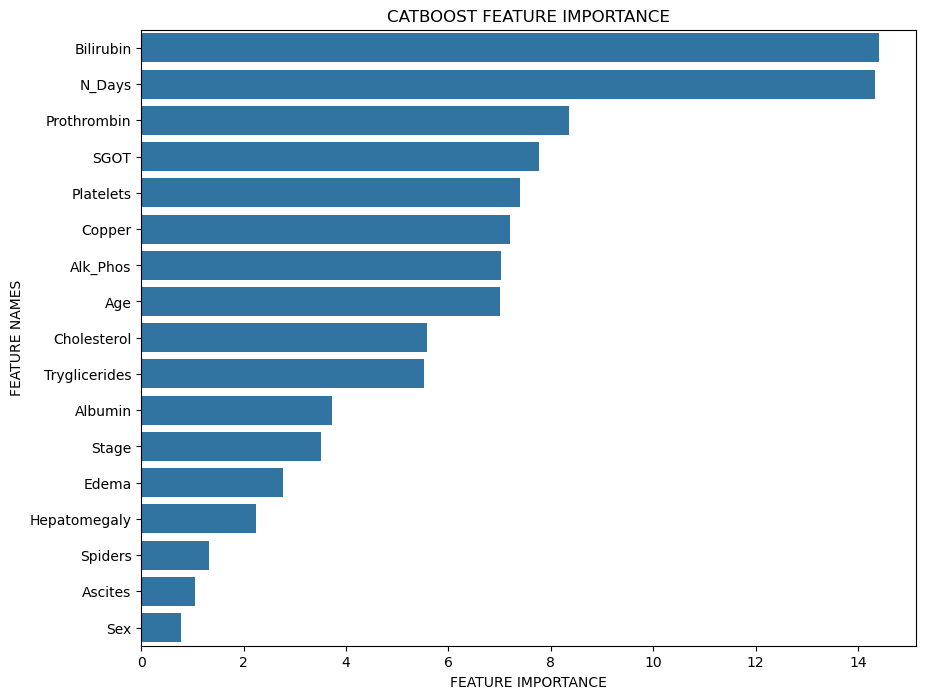

In [9]:
#Examen des caractéristiques les plus imporantes pour l'algorihtme
path = r"C:\Users\Frederic\Documents\GitHub\Tennis_analysis\Prediction-of-Cirrhosis-Outcomes"
train_path = os.path.abspath(path) + "/data" +"/train.csv"
df_train = pd.read_csv(train_path,index_col='id')
data = df_train.drop(columns=["Status"])
data = data.drop(columns=["Drug"])
plot_feature_importance(best_model.get_feature_importance(),data.columns,'CATBOOST')

In [13]:
y_pred.shape

(1581, 2)

In [12]:
y_test.shape

(1581,)